### Feature Selecton

Why Feature Enginnering : why dont we give whole dataset to the machine learning
algorithm to let itt decide which feature is important?

Answer:

- Curse of dimentionality
        
      if we have more features than the observations than we run the risk of massively overfitting our model.
      this  would generally result in terrrible out of sample performance
      
- Occam's Razor 
     
      we want our models to be simple and explainable. we lose explainlabiility when we have a lot of features

- Garbage in Garbage out
     
      Poor quality input will produce poor quality output

types

- Filter Based
      
        we specify some metric and based on that filter features. ex- coorelaton or chi square
        
- Wrapper Based

        these methods consider the selection of set of features as s search problem ex- recursive feature elimination

- Embedded

        Embedded methods uses algorithms that have built in feature selection methods ex- Lasso / RF

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/home/nucleya/Desktop/preprocessed_titanic.csv")

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,CA. 2343,1601,...,C22 C26,D,F33,E101,F2,B49,E25,S,C,Q
0,0,1.0,0.271174,0.125,0.0,0.014151,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1.0,0.321438,0.000,0.0,0.015469,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0.0,0.434531,0.125,0.0,0.103644,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,0.434531,0.000,0.0,0.015713,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1.0,0.367921,0.000,0.0,0.016510,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X = data.drop(labels='Survived', axis=1)
y = data['Survived']

In [5]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,female,male,CA. 2343,1601,347082,...,C22 C26,D,F33,E101,F2,B49,E25,S,C,Q
0,1.0,0.271174,0.125,0.0,0.014151,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.321438,0.000,0.0,0.015469,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.434531,0.125,0.0,0.103644,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [7]:
X.shape

(713, 30)

In [8]:
### 1. Variance threshold

In [9]:
from sklearn.feature_selection import VarianceThreshold

In [10]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [11]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]
constant_columns

['CA. 2343',
 '347082',
 '3101295',
 '347088',
 'CA 2144',
 'S.O.C. 14879',
 '382652',
 'PC 17757',
 'G6',
 'B96 B98',
 'C22 C26',
 'D',
 'F33',
 'E101',
 'F2',
 'B49']

In [12]:
# these columns have zero or near zero variance hence these columns 
# should be removed

### 2. Pearson Correlation

In [13]:
def corr_selector(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [14]:
corr_selector(X, 0.7)

{'C', 'C23 C25 C27', 'male'}

### 3. Chi Squared

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
chi_selector = SelectKBest(score_func=chi2, k=30)
ordered_feature=chi_selector.fit(X, y)

In [17]:
chi_support = chi_selector.get_support()

In [18]:
chi_support

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [19]:
chi_feature = X.loc[:,chi_support].columns.tolist()

In [20]:
chi_feature

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'female',
 'male',
 'CA. 2343',
 '1601',
 '347082',
 '3101295',
 '347088',
 'CA 2144',
 'S.O.C. 14879',
 '382652',
 'LINE',
 'PC 17757',
 'C23 C25 C27',
 'G6',
 'B96 B98',
 'C22 C26',
 'D',
 'F33',
 'E101',
 'F2',
 'B49',
 'E25',
 'S',
 'C',
 'Q']

In [21]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])

In [22]:
dfscores

,Score
0,10.610737
1,0.412999
2,0.911055
3,7.507545
4,2.693255
5,148.104815
6,62.671099
7,NaN
8,4.264160
9,NaN


CHi2 is not works great for this dataset

<AxesSubplot:>

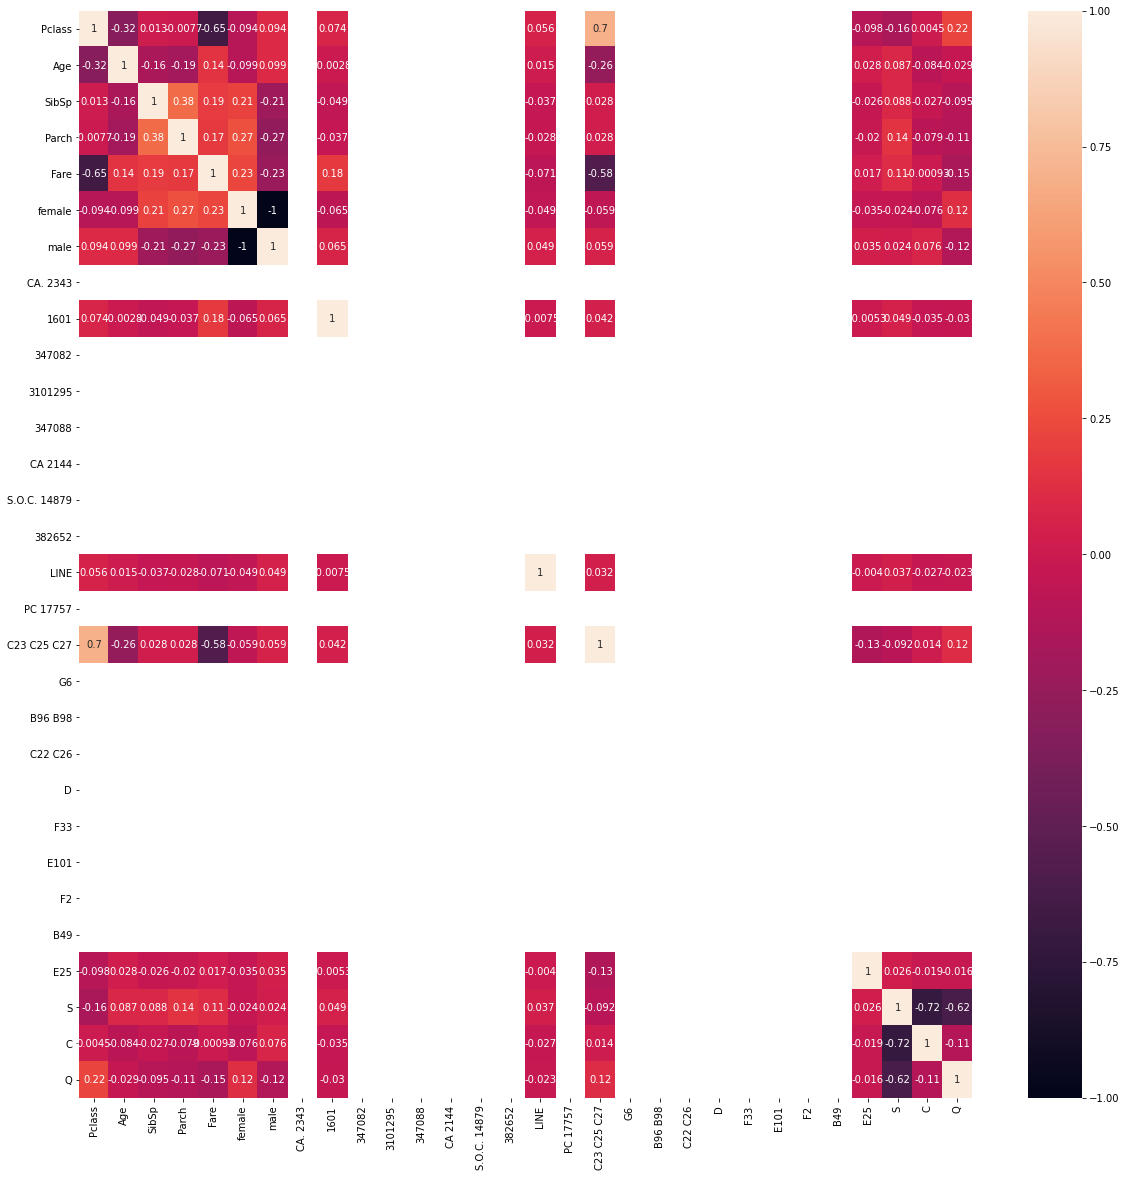

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=X.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X[top_features].corr(),annot=True)

### 4. Recursive Feature Elimination

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X, y)

Fitting estimator with 30 features.
Fitting estimator with 20 features.


RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)

In [25]:
rfe_support = rfe_selector.get_support()

In [26]:
rfe_support

array([ True,  True,  True,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False])

In [27]:
rfe_features = X.loc[:,rfe_support].columns.tolist()
rfe_features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'female',
 'male',
 '1601',
 'LINE',
 'C23 C25 C27',
 'E25']

### 5. Lasso: SelectFromModel

- for feature selection : lasso regression uses L1 norm as regression
- unlike ridge regression lasso norm regression regularizer drives parameters to zero
- higher the value of alpha, the fewer features have non zero values

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [29]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=10)
embeded_lr_selector.fit(X, y)

SelectFromModel(estimator=LogisticRegression(), max_features=10)

In [30]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()

In [31]:
embeded_lr_feature

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'female',
 'male',
 '1601',
 'LINE',
 'C23 C25 C27',
 'E25']

### 6. Tree-based: SelectFromModel

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [33]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=10)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(), max_features=10)

In [34]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()

In [35]:
embeded_rf_feature

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male']

### Extra 6:  LightGBM : feature_importances_

In [36]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=15)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

5 selected features


In [37]:
embeded_lgb_feature 

['Pclass', 'Age', 'Fare', 'female', 'male']